## Task 5 - Exploratory Data Analysis - Sports

### Submitted by - Nisha Kumari

#### ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

#### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_deliveries=pd.read_csv('deliveries.csv')
df_matches=pd.read_csv('matches.csv')

In [3]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### Summarizing the datasets

In [5]:
df_deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [6]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

#### Treating the Missing Values of the two dataset

In [11]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### The column 'umpire3' has a significant number of NaN values. As the off-field umpire parameter is insignificant,
#### we can drop this column. 
#### The other columns that have Nan values are of type object(Pandas equivalent of Python String data type) and 
#### are very few in number.

In [12]:
df_matches = df_matches.drop(columns=['umpire3'], axis=1)

In [13]:
df_matches[(df_matches.umpire1.isnull()) | (df_matches.umpire2.isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [14]:
df_matches[df_matches.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [15]:
df_matches['city'].fillna('Dubai', inplace = True)

In [16]:
df_matches[df_matches.winner.isnull()][['winner','result','win_by_wickets','team1','team2']]

,winner,result,win_by_wickets,team1,team2
300,NaN,no result,0,Delhi Daredevils,Pune Warriors
545,NaN,no result,0,Royal Challengers Bangalore,Rajasthan Royals
570,NaN,no result,0,Delhi Daredevils,Royal Challengers Bangalore
744,NaN,no result,0,Royal Challengers Bangalore,Rajasthan Royals


In [17]:
df_matches[df_matches.player_of_match.isnull()][['winner','player_of_match','result','team1','team2']]

,winner,player_of_match,result,team1,team2
300,NaN,NaN,no result,Delhi Daredevils,Pune Warriors
545,NaN,NaN,no result,Royal Challengers Bangalore,Rajasthan Royals
570,NaN,NaN,no result,Delhi Daredevils,Royal Challengers Bangalore
744,NaN,NaN,no result,Royal Challengers Bangalore,Rajasthan Royals


In [18]:
df_matches['winner'].fillna('Draw', inplace = True)

In [19]:
df_matches['player_of_match'].fillna('Draw', inplace = True)

In [20]:
df_matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


In [21]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [22]:
#city has 33 distinct values while we have 35 venues.
#Let's find out venues grouped by cities to see which cities have multiple venues

city_venue = df_matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

#### '''Observations
#### Bengaluru and Bangalore both are in the data when they are same. So we need to keep one of them.
#### Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium, Mohali whose #### value has not been entered correctly. We need to have either Chandigarh or Mohali as well as correct name of the stadium there.
#### Mumbai has 3 stadiums/venues used for IPL.
#### Pune has 2 venues for IPL.'''

### Overview of the Matches dataset

In [23]:
print('Number Of Matches Played :',df_matches.shape[0])

Number Of Matches Played : 756


In [24]:
print("Number Of Seasons Played : ",df_matches['season'].value_counts().nunique())

Number Of Seasons Played :  7


In [25]:
print("Top 10 Prominent Players of IPL :\n", df_matches['player_of_match'].value_counts()[:10])

Top 10 Prominent Players of IPL :
 CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64


In [26]:
print("Most Winning Team and Number Of Matches: \n",df_matches['winner'].value_counts())

Most Winning Team and Number Of Matches: 
 Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Draw                             4
Name: winner, dtype: int64


In [27]:
print("Most Winning Team: \n",df_matches['winner'].value_counts().idxmax())

Most Winning Team: 
 Mumbai Indians


In [28]:
print("Player Of The Match & Number Of Matches : \n",df_matches['player_of_match'].value_counts())

Player Of The Match & Number Of Matches : 
 CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
                  ..
P Parameswaran     1
AD Mathews         1
EJG Morgan         1
Shoaib Akhtar      1
KK Cooper          1
Name: player_of_match, Length: 227, dtype: int64


In [29]:
print("Player Of The Match For Max . Matches : \n",df_matches['player_of_match'].value_counts().idxmax())

Player Of The Match For Max . Matches : 
 CH Gayle


In [30]:
print("Number Of Seasons Played IN Different Cities : \n",df_matches.groupby('city')['season'].nunique())

Number Of Seasons Played IN Different Cities : 
 city
Abu Dhabi          1
Ahmedabad          3
Bangalore          9
Bengaluru          2
Bloemfontein       1
Cape Town          1
Centurion          1
Chandigarh         9
Chennai            8
Cuttack            3
Delhi             11
Dharamsala         4
Dubai              1
Durban             1
East London        1
Hyderabad         10
Indore             3
Jaipur             7
Johannesburg       1
Kanpur             2
Kimberley          1
Kochi              1
Kolkata           11
Mohali             2
Mumbai            11
Nagpur             1
Port Elizabeth     1
Pune               6
Raipur             3
Rajkot             2
Ranchi             3
Sharjah            1
Visakhapatnam      4
Name: season, dtype: int64


In [31]:
print("Number Of Winners In Different Cities \n",df_matches.groupby('city')['winner'].nunique())

Number Of Winners In Different Cities 
 city
Abu Dhabi          4
Ahmedabad          6
Bangalore         12
Bengaluru          7
Bloemfontein       2
Cape Town          6
Centurion          7
Chandigarh        10
Chennai            9
Cuttack            3
Delhi             15
Dharamsala         4
Dubai              5
Durban             7
East London        3
Hyderabad         13
Indore             5
Jaipur             9
Johannesburg       5
Kanpur             3
Kimberley          3
Kochi              4
Kolkata           12
Mohali             3
Mumbai            15
Nagpur             2
Port Elizabeth     5
Pune              12
Raipur             3
Rajkot             7
Ranchi             5
Sharjah            5
Visakhapatnam      8
Name: winner, dtype: int64


In [32]:
print("Winners in Cities \n",df_matches.groupby('city')['winner'].value_counts())

Winners in Cities 
 city           winner                 
Abu Dhabi      Rajasthan Royals           3
               Kings XI Punjab            2
               Chennai Super Kings        1
               Kolkata Knight Riders      1
Ahmedabad      Rajasthan Royals           7
                                         ..
Visakhapatnam  Rising Pune Supergiants    2
               Delhi Capitals             1
               Delhi Daredevils           1
               Kings XI Punjab            1
               Rajasthan Royals           1
Name: winner, Length: 219, dtype: int64


In [33]:
print("Match where team won by highest runs",df_matches.iloc[df_matches['win_by_runs'].idxmax()])

Match where team won by highest runs id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object


In [34]:
print("Match where team won by highest wickets",df_matches.iloc[df_matches['win_by_wickets'].idxmax()])

Match where team won by highest wickets id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                         

### Overview of the Delieveries dataset

In [35]:
print("Number Of Innings And Their Counts : \n",df_deliveries['inning'].value_counts())

Number Of Innings And Their Counts : 
 1    92742
2    86240
3       50
4       38
5        8
Name: inning, dtype: int64


In [36]:
print("Batting Team 's Max Counts :",df_deliveries['batting_team'].value_counts())

Batting Team 's Max Counts : Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64


In [37]:
print("Number Of Super Over Matches  : \n",df_deliveries['is_super_over'].value_counts())

Number Of Super Over Matches  : 
 0    178997
1        81
Name: is_super_over, dtype: int64


#### Data Visualization

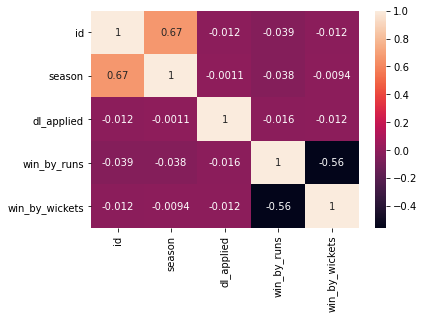

In [38]:
sns.heatmap(df_matches.corr(),annot=True)

In [39]:
df_matches.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


Text(0, 0.5, 'Count')

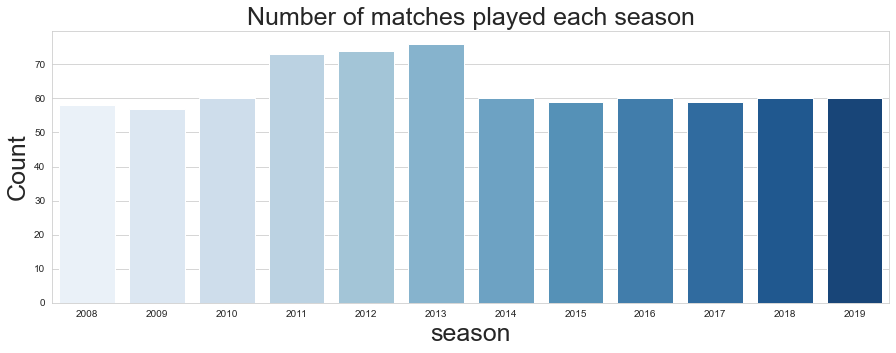

In [40]:
# Number of matches played in each season
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.countplot(x = 'season', data = df_matches,palette='Blues')
plt.title("Number of matches played each season", size = 25)
plt.xlabel("season", size = 25)
plt.ylabel("Count", size = 25)

As seen clearly Season held in 2011,2012,2013 have more matches than other seasons.

Season held in 2011,2012,2013 have more than 70 matches.

All other Seasons have approximately 58-60 matches

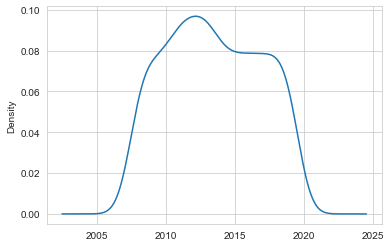

In [41]:
df_matches['season'].plot(kind="kde")

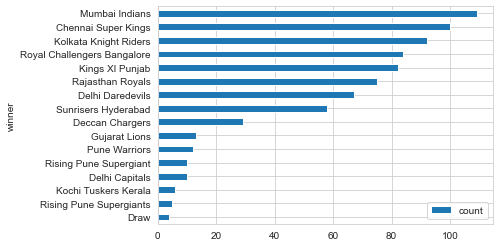

In [42]:
df_matches.groupby('winner')['winner'].agg(['count']).sort_values('count').reset_index().plot(x='winner',y='count',kind='barh')

##### Mumbai Indians won maximum number of matches followed by Chennai Super Kings.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

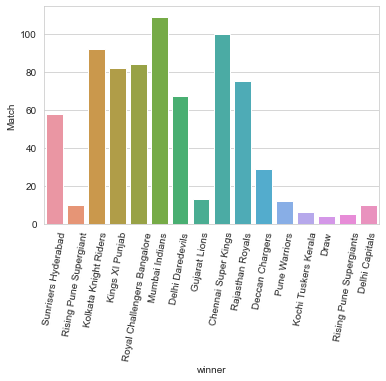

In [43]:
ax=sns.countplot(x='winner',data=df_matches)
plt.ylabel('Match')
plt.xticks(rotation=80)

Mumbai Indians has highest number of wins

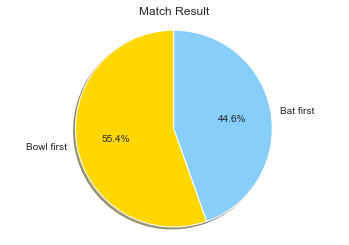

In [44]:
df_matches['win_by']=np.where(df_matches['win_by_runs']>0,'Bat first','Bowl first')
match=df_matches.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['gold', 'lightskyblue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Match Result')
plt.axis('equal')
plt.show()

Teams won match 55.4% times after bowling first and 44.6% times after batting first 

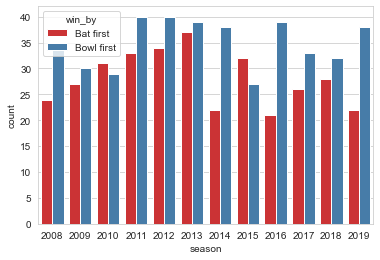

In [45]:
sns.countplot('season',hue='win_by',data=df_matches,palette="Set1")

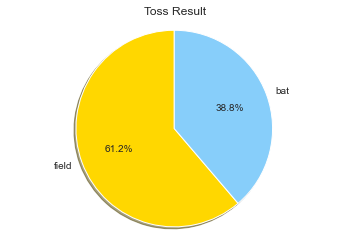

In [46]:
toss=df_matches.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']

 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Result')
plt.axis('equal')
plt.show()

Teams won match 61.2% times after choosing to field first and 38.8% times after choosing to bat first

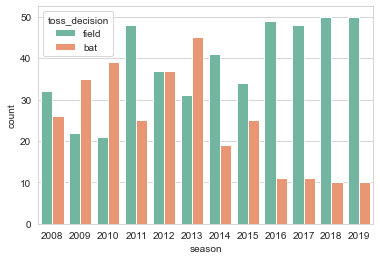

In [47]:
sns.countplot('season',hue='toss_decision',data=df_matches,palette="Set2")

In [48]:
# Final season winners of each year
final_matches=df_matches.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [49]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [50]:
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: winner, dtype: int64

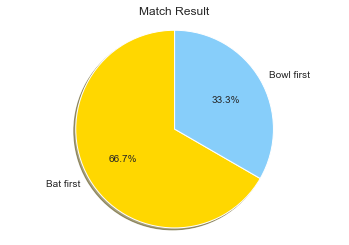

In [51]:
match=final_matches.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['gold', 'lightskyblue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Match Result')
plt.axis('equal')
plt.show()

In the final matches of all the season team who went for batting first won 66.7% time and those who bowled first won 33.3% times

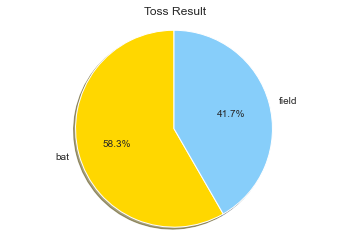

In [52]:
toss=final_matches.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']

 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Result')
plt.axis('equal')
plt.show()

In the final matches of the season team who won the toss and chose to bat won 58.3% and the team who chose to bowl first won 41.7% times

In [53]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [54]:
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [85]:
df_deliveries.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.003958,0.008268,-0.001349,-0.009150,-0.007549,0.000905,-0.012429,-0.004623,-0.001475,0.033510,-0.013323,0.030727
inning,0.003958,1.000000,-0.050076,-0.003943,0.084154,0.001201,-0.000757,-0.001996,-0.000904,0.003442,-0.005362,-0.000531,-0.005485
over,0.008268,-0.050076,1.000000,-0.007424,-0.034329,-0.010003,0.012111,-0.004764,0.016984,-0.000979,0.086701,-0.002479,0.086326
ball,-0.001349,-0.003943,-0.007424,1.000000,-0.001143,-0.004665,0.006602,-0.002727,0.000567,0.000711,0.007950,-0.002576,0.007414
is_super_over,-0.009150,0.084154,-0.034329,-0.001143,1.000000,-0.001019,0.001353,0.001735,0.013640,-0.000071,0.010125,0.003504,0.010891
wide_runs,-0.007549,0.001201,-0.010003,-0.004665,-0.001019,1.000000,-0.006196,-0.015855,-0.008675,0.012817,-0.094579,0.720916,0.059077
bye_runs,0.000905,-0.000757,0.012111,0.006602,0.001353,-0.006196,1.000000,-0.004596,-0.002515,-0.000142,-0.018936,0.332352,0.051946
legbye_runs,-0.012429,-0.001996,-0.004764,-0.002727,0.001735,-0.015855,-0.004596,1.000000,-0.006434,-0.000362,-0.070106,0.554458,0.048075
noball_runs,-0.004623,-0.000904,0.016984,0.000567,0.013640,-0.008675,-0.002515,-0.006434,1.000000,-0.000198,0.004832,0.194899,0.046427
penalty_runs,-0.001475,0.003442,-0.000979,0.000711,-0.000071,0.012817,-0.000142,-0.000362,-0.000198,1.000000,-0.002591,0.057882,0.009755


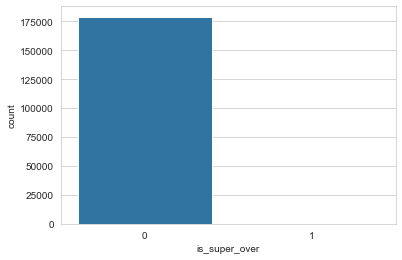

In [86]:
sns.countplot(df_deliveries['is_super_over'])

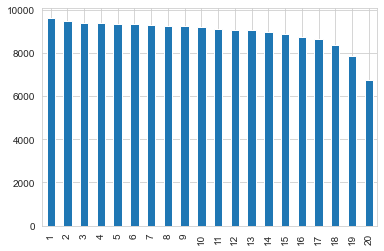

In [87]:
df_deliveries['over'].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Number of total runs in Different Seasons')

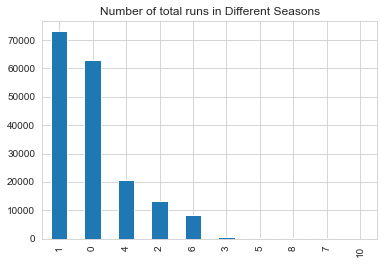

In [88]:
df_deliveries['total_runs'].value_counts().plot(kind="bar")
plt.title('Number of total runs in Different Seasons')

Text(0.5, 1.0, 'Wide Runs Scored In Matches')

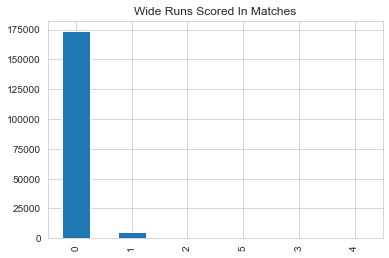

In [89]:
df_deliveries['wide_runs'].value_counts().plot(kind="bar")
plt.title("Wide Runs Scored In Matches")

In [90]:
df_deliveries.corr()['total_runs'].sort_values(ascending=False)

total_runs       1.000000
batsman_runs     0.977278
extra_runs       0.098363
over             0.086326
wide_runs        0.059077
bye_runs         0.051946
legbye_runs      0.048075
noball_runs      0.046427
match_id         0.030727
is_super_over    0.010891
penalty_runs     0.009755
ball             0.007414
inning          -0.005485
Name: total_runs, dtype: float64

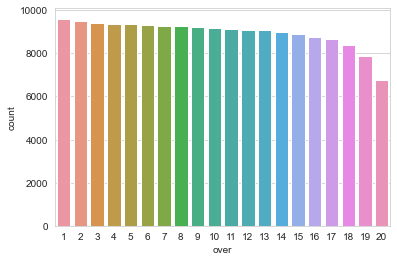

In [91]:
df_deliveries['over'].value_counts()
sns.countplot(df_deliveries['over'])

In [92]:
df_deliveries['noball_runs'].value_counts()

0    178364
1       698
2         9
5         6
3         1
Name: noball_runs, dtype: int64

In [55]:
# Now, We will merge the 2 datasets for better insights from the data
# merging the 2 datasets

complete_data=df_deliveries.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [72]:
complete_data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'winner'],
      dtype='object')

Text(0, 0.5, 'Total Runs Scored')

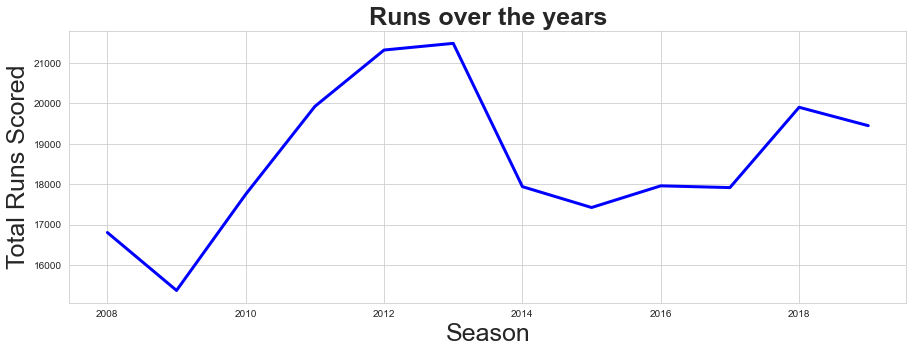

In [73]:
complete_data.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5), color = 'blue')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)

Run scoring has gone up from the start of the IPL in 2008.

Text(0, 0.5, 'Total Runs Scored')

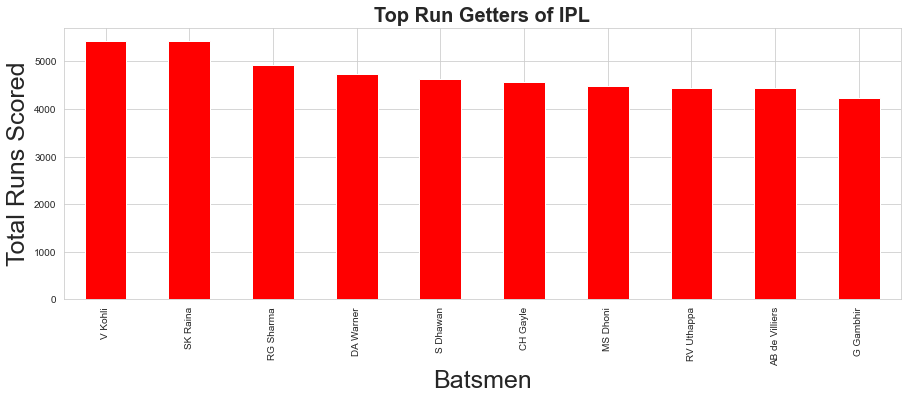

In [74]:
complete_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'red',figsize = (15,5))

plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)

Except for MS Dhoni, all other top run getters are either openers or come in 3rd or 4th positions to bat.
Suresh Raina is the highest run getter in IPL.

Text(0, 0.5, 'Total Runs Scored each season')

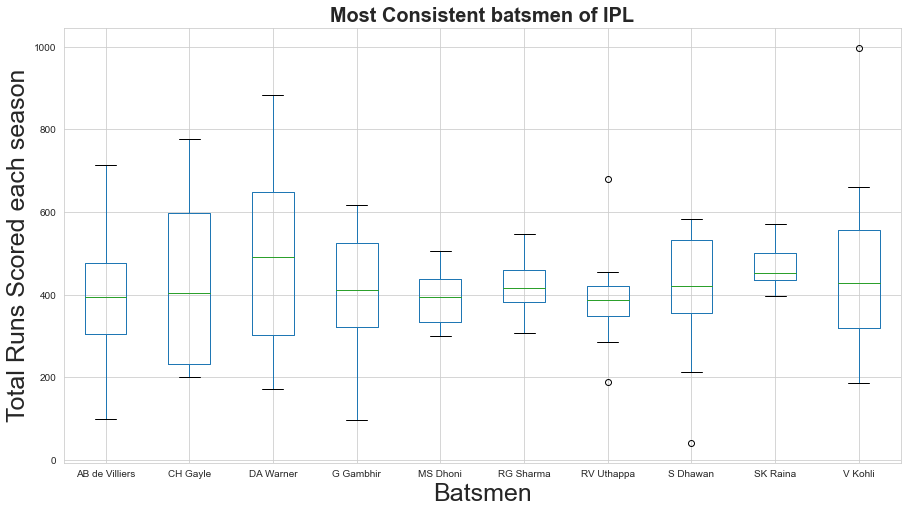

In [76]:
consistent_batsman = complete_data[complete_data.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir','RV Uthappa', 'S Dhawan',
                                               'CH Gayle', 'MS Dhoni', 'DA Warner', 'AB de Villiers'])]
[['batsman','season','total_runs']]

consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored each season", size = 25)

Median score for Raina is above all the top 10 run getters. He has the highest lowest run among all the batsmen across 11 seasons.
Considering the highest and lowest season totals and spread of runs, it seems Raina has been most consistent among all.

Text(0, 0.5, 'Total Wickets Taken')

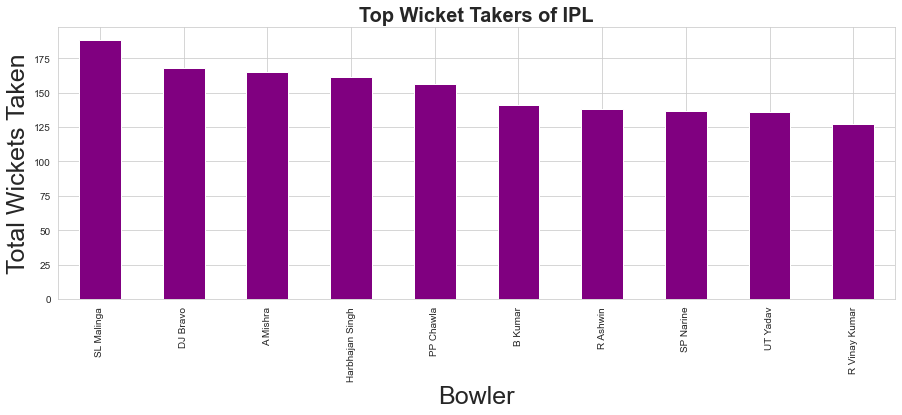

In [77]:
complete_data.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)

Malinga has taken the most number of wickets in IPL followed by Bravo and Amit Mishra.
In top 10 bowlers, 5 are fast and medium pacers while the other 5 are spinners.
All 5 spinners are right arm spinners and 2 are leg spinners while 3 are off spinners.
All 5 pacers are right arm pacer.

In [78]:
#We will consider players who have played 10 or more seasons

no_of_balls = pd.DataFrame(complete_data.groupby('batsman')['ball'].count()) 
runs = pd.DataFrame(complete_data.groupby('batsman')['batsman_runs'].sum()) 
seasons = pd.DataFrame(complete_data.groupby('batsman')['season'].nunique()) 

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


Text(0, 0.5, 'Strike Rate')

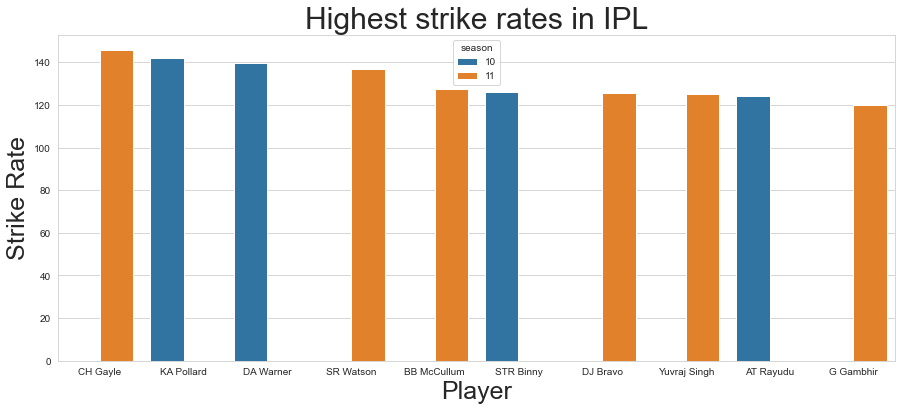

In [79]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 30)
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)

Gayle and Pollard have the highest strike rates in IPL. They are the big hitters and can win any match on their day.

In [80]:
#strike_rate = balls bowled by wickets taken

balls_bowled = pd.DataFrame(complete_data.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(complete_data[complete_data['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(complete_data.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

In [81]:
bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
def highlight_cols(s):
    color = 'skyblue'
    return 'background-color: %s' % color

#Strike rate for bowlers who have taken more than 50 wickets

best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate', ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


Some Insights:
>The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

>Teams which Bowl first has higher chances of winning then the team which bat first.

>Top player of match winning are CH gayle, AB de villers.

>In finals most teams after winning toss decide to do fielding first.

>After winning toss more teams decide to do fielding first.

>It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.

>Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

>The IPL most wicket taken blower is SL Malinga.